In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split, learning_curve, validation_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

In [11]:
def get_accuracy(model):

    print('-' * 80)
    print(f'\nMODEL: {model}\n')

    # Get sklearn accuracy score for given model; e.g., https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print(f'[*] Train Score: {str(train_score)}')
    print(f'[*] Test Score: {str(test_score)}')

    y_pred = model.predict(X_test)
    print('\n[*] Test Classification Report: \n', metrics.classification_report(y_test, y_pred))

    print('[*] Confusion Matrix on Test data')
    '''
    metrics.ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=list(range(2)), # length of unique values for label
    )
    '''
    cm = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

    print(f'[*] Test Accuracy: {str(round(test_score, 5) * 100)}%')
    print('-' * 80 + '\n')

def select_optimal_model_parameters(default_model, gridsearch_model):
    """ Calculates accuracy for the default and Gridsearch nominated parameters and appends the model with the highest accuracy to the model evaluation list """
    # save for selection comparison against GridSearch nomination
    y_pred = default_model.predict(X_test)
    default_model_acc = metrics.accuracy_score(y_test, y_pred) *100

    y_pred = gridsearch_model.predict(X_test)
    gridsearch_model_acc = metrics.accuracy_score(y_test, y_pred) *100

    # Compare the default and GridSearch paramaters for highest accuracy model to append to evaluation list
    if default_model_acc >= gridsearch_model_acc:
        print('Default parameter model selected')
        models.append(default_model)
    else:
        print('Gridsearch parameter model selected')
        models.append(gridsearch_model)

In [12]:
def plot_learning_curve(estimator, X, y, train_sizes, cv):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring='accuracy', n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Score')
    plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy Score')
    plt.legend()
    plt.show()

def plot_validation_curve(clf, X_train, y_train, param_name, cv):
    # Define the hyperparameter range
    param_range = np.arange(1, 21)

    # Calculate training and validation scores over the specified hyperparameter range
    train_scores, test_scores = validation_curve(
        clf, X_train, y_train, param_name=param_name, param_range=param_range,
        cv=cv, scoring="accuracy", n_jobs=-1
    )

    # Plot the validation curve
    plt.figure(figsize=(10, 6))
    plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Score')
    plt.title('Model Complexity Graph')
    plt.xlabel(f'{param_name}')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [18]:
models = []
file_path = "Obfuscated-MalMem2022.csv"
data = pd.read_csv(file_path)
# data.head()
# data.describe().T
# data.info()
data.drop(['handles.nport', 'pslist.nprocs64bit', 'svcscan.interactive_process_services'], axis=1, inplace=True)
data = data.sample(n=40000, random_state=42)


data['Class'].replace({'Benign':0, 'Malware':1}, inplace=True)
data[['Cat1', 'Cat2']] = data['Category'].str.extract('(\w+)-(\w+)-.*', expand=True).fillna('Benign')
label_encoder = LabelEncoder()
data['Cat1'] = label_encoder.fit_transform(data['Cat1'])
data['Cat2'] = label_encoder.fit_transform(data['Cat2'])

# correlation_matrix = data.corr()
# plt.figure(figsize=(40,40))
# sns.heatmap(correlation_matrix, annot=True, center=0)

data.drop(['Category'], axis=1, inplace=True)

# correlations = []
# for feature in data.columns:
#     corr = data['Class'].corr(data[feature]) * 100
#     abs_corr = abs(corr)
#     correlations.append(abs_corr)
# y = sorted(correlations)
# X = [x for x in range(len(y))]
# mean = np.mean(correlations)
# fourth_quant = np.quantile(correlations, 0.75)
# high_correlation_threshold = fourth_quant # equals 74

# hc_features = []
# for feature in data.columns:
#     corr = data['Class'].corr(data[feature]) * 100
#     abs_corr = abs(corr)
#     if abs_corr > high_correlation_threshold:
#         hc_features.append(feature)
# hc_data = pd.DataFrame(data[hc_features])
# # hc_data.info()
# features=hc_data.columns
# scaled_ds=pd.DataFrame(hc_data, columns=hc_data.columns)
# for feature in features:
#     Q1 = scaled_ds[feature].quantile(0.25)
#     Q3 = scaled_ds[feature].quantile(0.75)
#     IQR = Q3 - Q1

#     scaled_ds = scaled_ds[~((scaled_ds[feature] < (Q1 - 1.5 * IQR)) | (scaled_ds[feature] > (Q3 + 1.5 * IQR)))]

# X = scaled_ds[features]
# y = scaled_ds['Class']

X=pd.DataFrame(data)
X.drop(['Class','Cat1','Cat2'],axis=1,inplace=True)
y=pd.DataFrame(data['Class'])

C:\Users\Abhishek.Agarwal\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


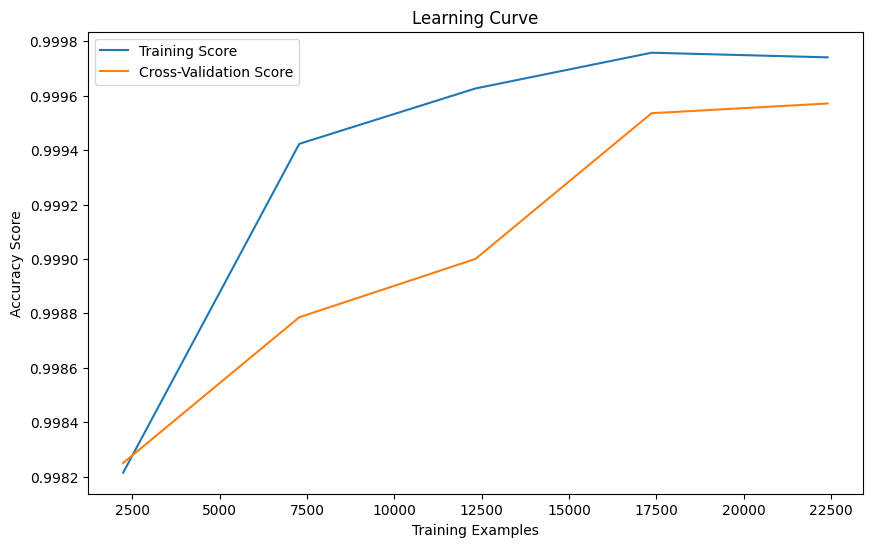

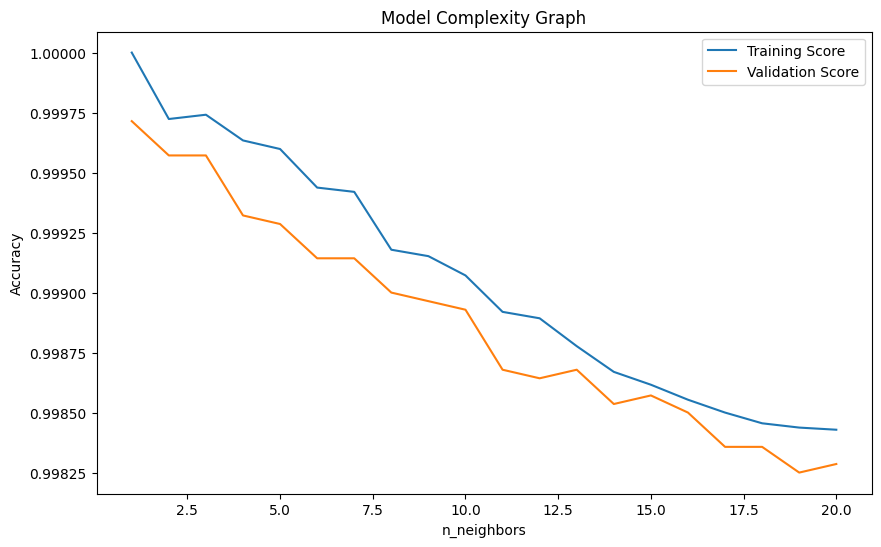

C:\Users\Abhishek.Agarwal\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy on Test Set: 0.9998
F1 Score on Test Set: 0.9997
--------------------------------------------------------------------------------

MODEL: KNeighborsClassifier(n_neighbors=3)

[*] Train Score: 0.99975
[*] Test Score: 0.9996666666666667

[*] Test Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6214
           1       1.00      1.00      1.00      5786

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000

[*] Confusion Matrix on Test data


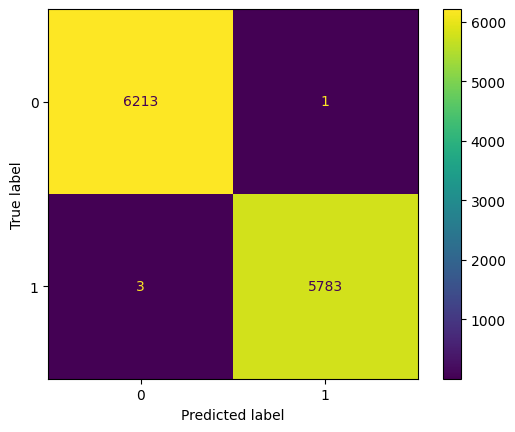

[*] Test Accuracy: 99.967%
--------------------------------------------------------------------------------



C:\Users\Abhishek.Agarwal\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


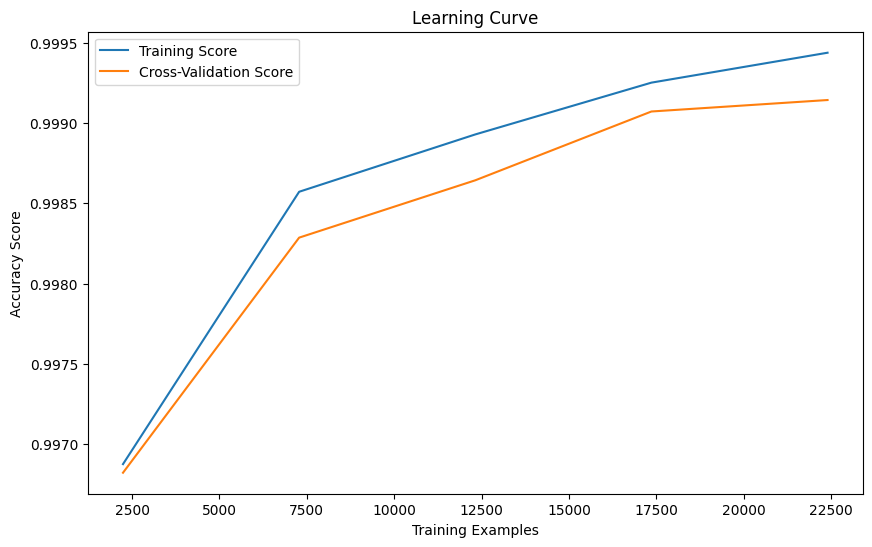

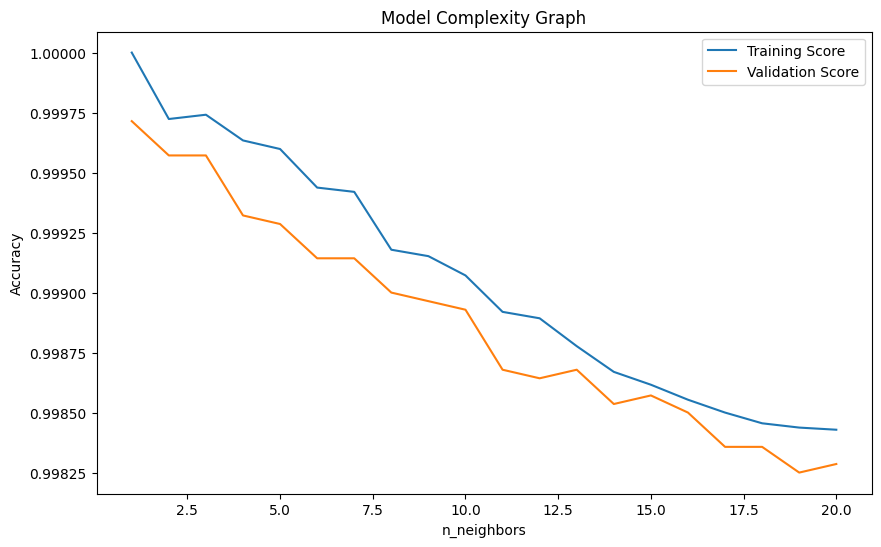

C:\Users\Abhishek.Agarwal\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy on Test Set: 0.9996
F1 Score on Test Set: 0.9996
--------------------------------------------------------------------------------

MODEL: KNeighborsClassifier(n_neighbors=6)

[*] Train Score: 0.9996428571428572
[*] Test Score: 0.9995

[*] Test Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6214
           1       1.00      1.00      1.00      5786

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000

[*] Confusion Matrix on Test data


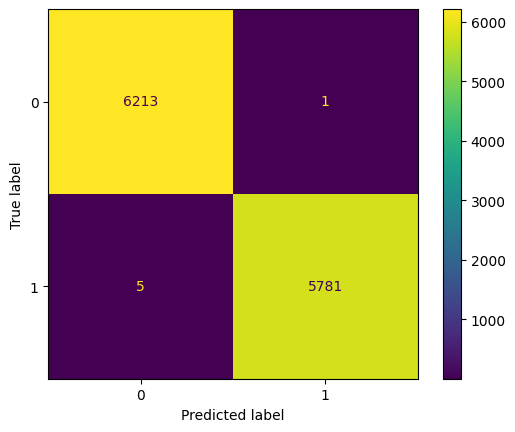

[*] Test Accuracy: 99.95%
--------------------------------------------------------------------------------



C:\Users\Abhishek.Agarwal\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


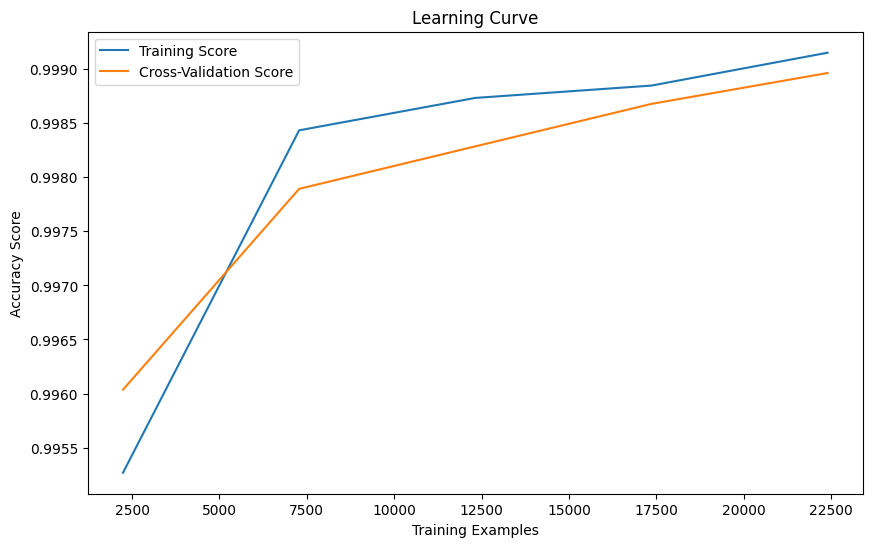

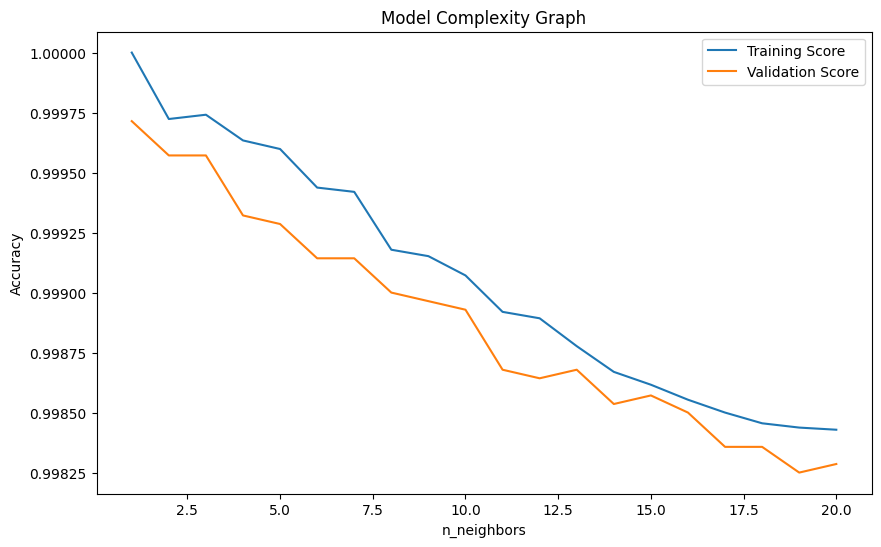

C:\Users\Abhishek.Agarwal\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy on Test Set: 0.9994
F1 Score on Test Set: 0.9994
--------------------------------------------------------------------------------

MODEL: KNeighborsClassifier(n_neighbors=9)

[*] Train Score: 0.9993214285714286
[*] Test Score: 0.99925

[*] Test Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6214
           1       1.00      1.00      1.00      5786

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000

[*] Confusion Matrix on Test data


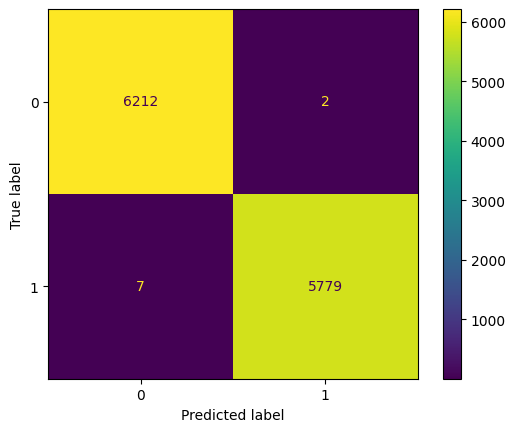

[*] Test Accuracy: 99.925%
--------------------------------------------------------------------------------



C:\Users\Abhishek.Agarwal\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Abhishek.Agarwal\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


--------------------------------------------------------------------------------

MODEL: KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

[*] Train Score: 1.0
[*] Test Score: 0.9996666666666667

[*] Test Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6214
           1       1.00      1.00      1.00      5786

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000

[*] Confusion Matrix on Test data


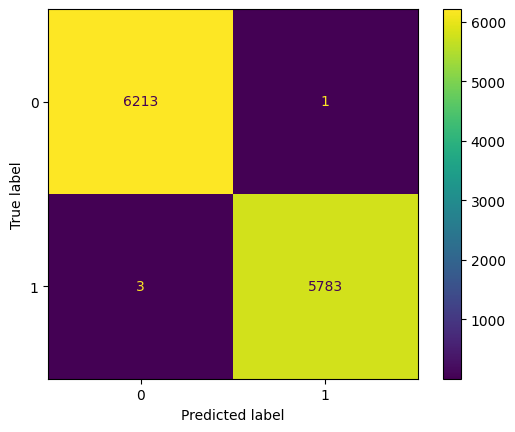

[*] Test Accuracy: 99.967%
--------------------------------------------------------------------------------

Gridsearch parameter model selected
Total time taken : 387.96 seconds


In [19]:
import time
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import MinMaxScaler

# Instantiate the scaler
scaler = MinMaxScaler()
scaler.fit(X_train)

# Scaler Transform
X_train[X_train.columns] = scaler.transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

# Impacted accuracy when changed, implies model were sensitive to less distance (-1 to 1 vs. 0 to 1)
# Using manual replacement instead
y_train.replace(-1.0, 0, inplace=True)
y_test.replace(-1.0, 0, inplace=True)

for k in [3,6,9]:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)

    # Plot learning curve
    train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    # Plot the learning curve
    plot_learning_curve(clf, X_train, y_train, train_sizes, cv=5)
    # Plot the Validation curve
    plot_validation_curve(clf,X_train, y_train,'n_neighbors', cv=5)

    param_range = np.arange(1, 21)
    # Fit the final model with the optimal max_depth
    optimal_max_depth = param_range[np.argmax(np.mean(test_scores, axis=1))]
    final_clf = KNeighborsClassifier(n_neighbors=k, weights='distance',algorithm='auto',p=2)
    final_clf.fit(X_train, y_train)

    # Evaluate on the test set
    y_pred = final_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy on Test Set: {accuracy:.4f}")
    print(f"F1 Score on Test Set: {f1:.4f}")

    get_accuracy(clf)

end_time = time.time()

grid_values = {
    'n_neighbors': [3,5,7,9],
    'weights': ['uniform','distance'],
    'p': [1, 2]
}

# Instantiate and fit the GridSearch run
grid_search = GridSearchCV(clf, param_grid=grid_values, cv=5, scoring='accuracy', n_jobs=-1).fit(X_train, y_train)
grid_search.fit(X_train, y_train)
clf_gs = grid_search.best_estimator_

# Review the GridSearch nominated optimal model parameters
grid_search.best_estimator_.get_params()

get_accuracy(clf_gs)

select_optimal_model_parameters(clf, clf_gs)


total_time = end_time-start_time
print(f"Total time taken : {total_time:.2f} seconds")

--------------------------------------------------------------------------------

MODEL: KNeighborsClassifier(n_neighbors=3)



C:\Users\Abhishek.Agarwal\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[*] Train Score: 0.99975
[*] Test Score: 0.9996666666666667

[*] Test Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6214
           1       1.00      1.00      1.00      5786

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000

[*] Confusion Matrix on Test data


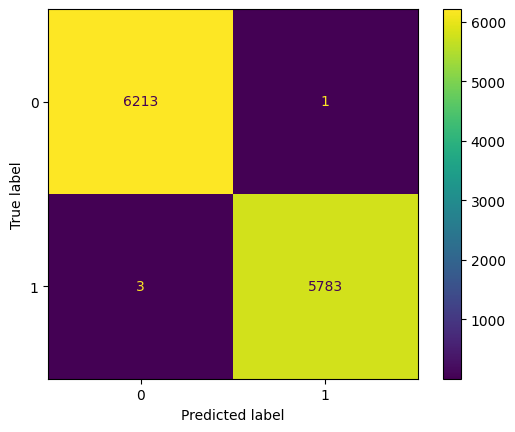

[*] Test Accuracy: 99.967%
--------------------------------------------------------------------------------

CPU times: total: 13.9 s
Wall time: 3.73 s


In [20]:
%%time

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

# Display performance metrics
get_accuracy(clf)

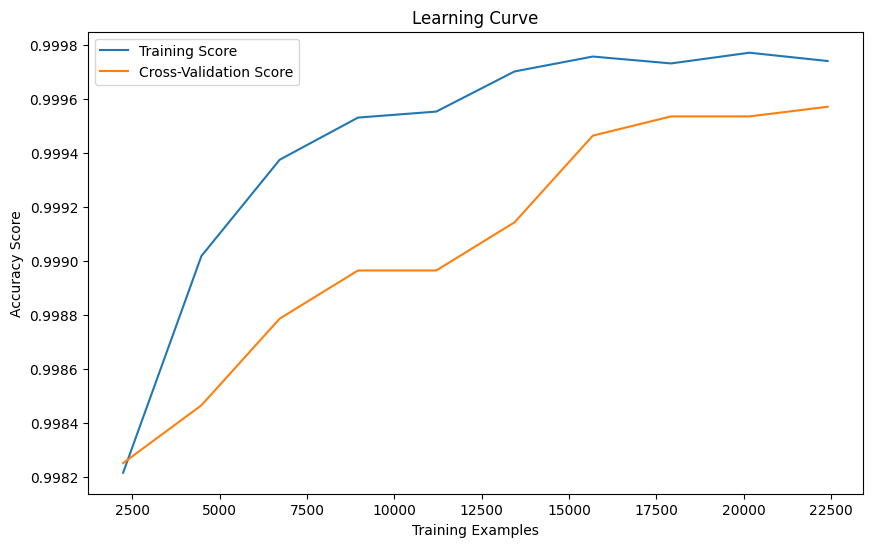

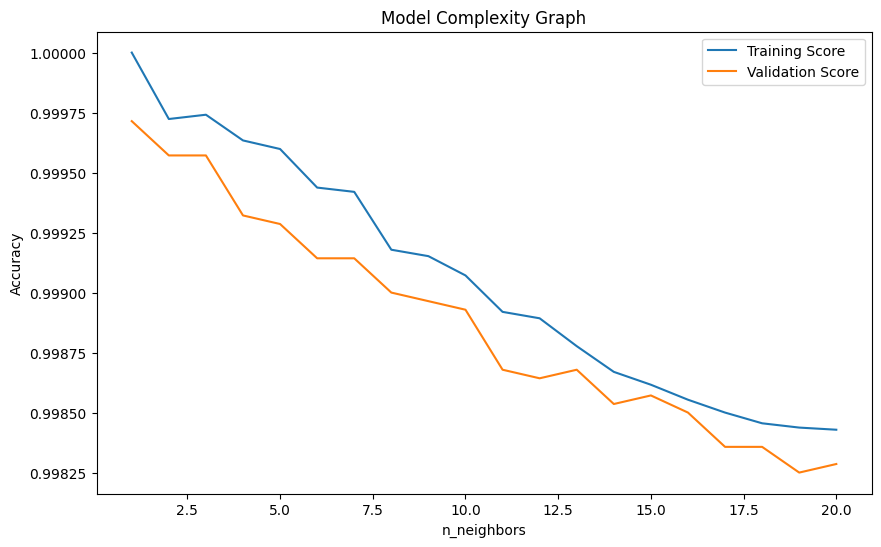

In [21]:
train_sizes = np.linspace(0.1, 1.0, 10)

# Plot the learning curve
plot_learning_curve(clf, X_train, y_train, train_sizes, cv=5)
# Plot the Validation curve
plot_validation_curve(clf,X_train, y_train,'n_neighbors', cv=5)

C:\Users\Abhishek.Agarwal\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Abhishek.Agarwal\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


--------------------------------------------------------------------------------

MODEL: KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

[*] Train Score: 1.0
[*] Test Score: 0.9996666666666667

[*] Test Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6214
           1       1.00      1.00      1.00      5786

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000

[*] Confusion Matrix on Test data


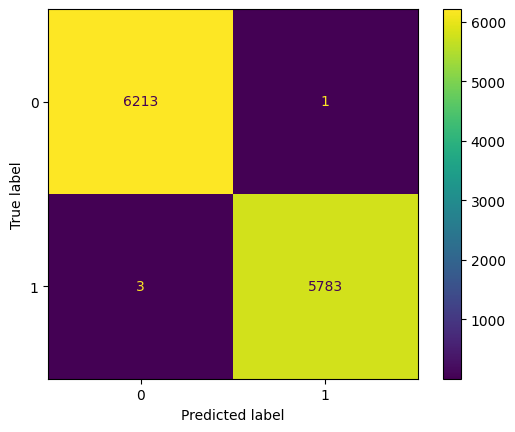

[*] Test Accuracy: 99.967%
--------------------------------------------------------------------------------

GridSearchCV Best Parameters:
{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
CPU times: total: 1min 30s
Wall time: 1min 45s


In [22]:
%%time

grid_values = {
    'n_neighbors': [3,5,7,9],
    'weights': ['uniform','distance'],
    'p': [1, 2]
}

# Instantiate and fit the GridSearch run
grid_search = GridSearchCV(clf, param_grid=grid_values, cv=5, scoring='accuracy', n_jobs=-1).fit(X_train, y_train)
grid_search.fit(X_train, y_train)
clf_gs = grid_search.best_estimator_

# Review the GridSearch nominated optimal model parameters
grid_search.best_estimator_.get_params()

get_accuracy(clf_gs)
# Additional details from GridSearchCV
print("GridSearchCV Best Parameters:")
print(grid_search.best_params_)

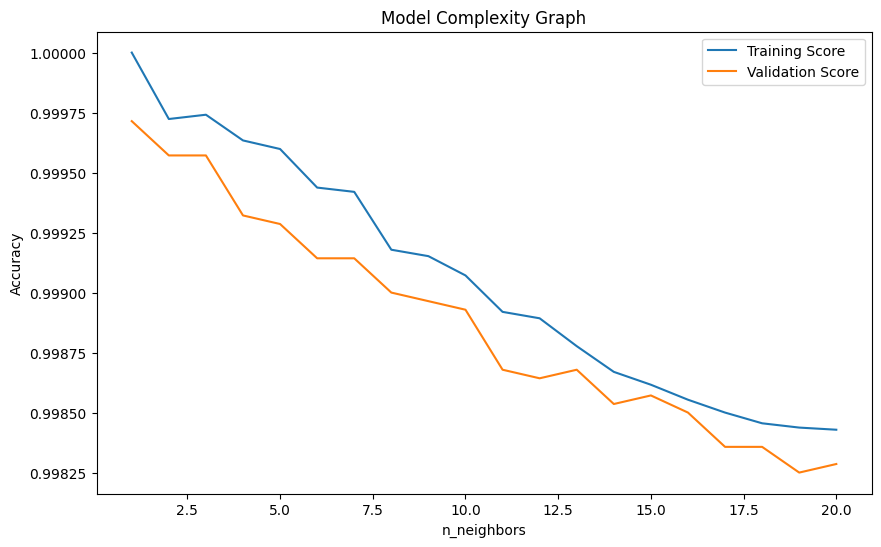

KeyboardInterrupt: 

In [24]:
plot_validation_curve(clf,X_train, y_train,'n_neighbors', cv=5)
plot_validation_curve(clf,X_train, y_train,'p', cv=5)